In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 
mpl.style.use('seaborn-whitegrid')

/Users/ohwadalab-mac/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ohwadalab-mac/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ohwadalab-mac/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('./dairycow-early.csv',sep=',')

In [3]:
df.head()

,global,cowid,days,TP,ALB,BUN,CHO,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB
0,863934238,205,31,7.8,3.4,8.0,153,91,20,10.9,4.9,51,109,417,680.4
1,864770057,62,32,6.8,3.8,11.5,178,67,27,10.5,5.0,54,111,196,601.6
2,856563216,297,32,7.1,2.8,8.2,161,52,23,10.0,6.6,64,57,189,287.9
3,1399102221,44,33,7.4,3.6,10.5,211,81,26,10.5,5.8,52,97,374,1108.5
4,1461212865,87,37,6.9,3.6,10.4,165,76,25,10.4,4.9,54,135,608,648.0


In [4]:
df_tr = df

In [5]:
#Standardize
#Calculate the z score of each value in the sample, 
#relative to the sample mean and standard deviation.
clmns = ['TP','ALB','BUN','GOT', 'GGT', 'CA','IP','GLU','NH3', 'NEFA','BHB']
df_tr_std = stats.zscore(df_tr[clmns])

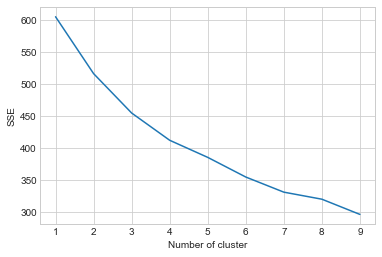

In [6]:
# Elbow method to decide best number of k
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_tr_std)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df_tr_std)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_tr_std, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.12907263806137334
For n_clusters=3, The Silhouette Coefficient is 0.1208600099990965
For n_clusters=4, The Silhouette Coefficient is 0.13826250270038412
For n_clusters=5, The Silhouette Coefficient is 0.09368066549926167
For n_clusters=6, The Silhouette Coefficient is 0.11187595008739272
For n_clusters=7, The Silhouette Coefficient is 0.12794473773316437
For n_clusters=8, The Silhouette Coefficient is 0.0994829191637373
For n_clusters=9, The Silhouette Coefficient is 0.12269876811066013
For n_clusters=10, The Silhouette Coefficient is 0.10698991060783755


In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_


In [9]:
df_tr['clusters'] = labels

In [10]:
clmns.extend(['clusters'])


In [11]:
df_tr

,global,cowid,days,TP,ALB,BUN,CHO,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB,clusters
0,863934238,205,31,7.8,3.4,8.0,153,91,20,10.9,4.9,51,109,417,680.4,0
1,864770057,62,32,6.8,3.8,11.5,178,67,27,10.5,5.0,54,111,196,601.6,0
2,856563216,297,32,7.1,2.8,8.2,161,52,23,10.0,6.6,64,57,189,287.9,1
3,1399102221,44,33,7.4,3.6,10.5,211,81,26,10.5,5.8,52,97,374,1108.5,0
4,1461212865,87,37,6.9,3.6,10.4,165,76,25,10.4,4.9,54,135,608,648.0,0
5,864142540,48,37,7.3,3.8,8.6,159,85,23,10.4,5.5,58,150,1118,759.4,0
6,1483811640,65,42,7.1,3.9,8.8,236,78,45,11.5,4.8,63,145,816,543.8,0
7,1396615953,72,43,7.4,3.7,9.0,162,106,29,10.6,4.5,69,113,726,468.0,0
8,1432015518,281,43,7.4,3.5,12.0,230,85,44,10.5,5.9,59,55,309,518.5,1
9,864207157,61,50,7.5,3.3,8.4,153,69,31,11.4,5.5,56,137,206,280.2,1


In [12]:
#df_tr.to_csv('./cluster-dairy-early.csv')

In [13]:
mean = df_tr[clmns].groupby(['clusters']).mean()
mean

,TP,ALB,BUN,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB
clusters,,,,,,,,,,,
0,7.225000,3.712500,9.675000,81.500000,26.500000,10.812500,5.112500,57.500000,120.250000,558.875000,658.575000
1,7.629412,3.400000,11.017647,76.705882,33.941176,10.576471,5.941176,62.705882,105.470588,187.176471,417.570588
2,7.600000,3.693333,14.330000,92.033333,36.166667,11.020000,6.086667,55.366667,157.033333,267.500000,413.656667


In [14]:
#mean

In [15]:
#mean.to_csv('./mean-dairyearly.csv')

In [16]:
std = df_tr[clmns].groupby(['clusters']).std()
std

,TP,ALB,BUN,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB
clusters,,,,,,,,,,,
0,0.319598,0.172689,1.229111,12.750350,8.417668,0.513914,0.438952,6.117889,20.190167,319.067139,209.009479
1,0.417978,0.215058,2.189816,15.794638,8.204195,0.652428,1.226814,5.300527,40.475483,56.956382,101.623606
2,0.522593,0.168018,2.847522,13.052899,7.216281,0.695503,1.008835,5.991277,29.229748,126.147628,103.619981


In [17]:
std.to_csv('./std1.csv')

In [18]:
#df_tr.to_csv('./beforeclust.csv')

Text(23.72127604166667, 0.5, 'IP')

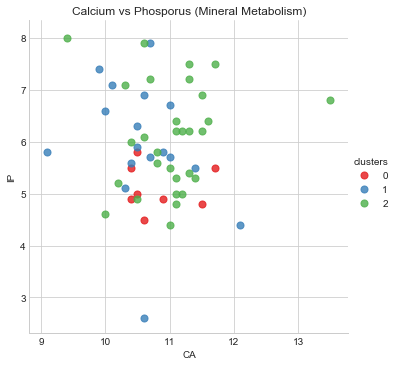

In [19]:
#Scatter plot 
ax = sns.lmplot('CA', 'IP', 
          data=df_tr, 
         fit_reg=False, 
        hue="clusters",  palette="Set1",
       scatter_kws={"marker": "D", 
                   "s": 50})

plt.title('Calcium vs Phosporus (Mineral Metabolism)')
plt.xlabel('CA')
plt.ylabel('IP')


In [20]:
#import matplotlib.pyplot as plt
#import numpy as np
#from mpl_toolkits.mplot3d import Axes3D

#from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(10, 8))
#ax1 = fig.add_subplot(111,projection='3d')

#for i in range(len(df_tr)):
 #   x, y, z = df_tr.iloc[i]['BUN'], df_tr.iloc[i]['ALB'], df_tr.iloc[i]['TP']
 #   ax1.scatter(x, y, z, c=['blue'])
    #now that you have the coordinates you can apply whatever text you need. I'm 
    #assuming you want the index, but you could also pass a column name if needed
#    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['clusters']), size=12)

#ax1.set_xlabel('BHB')
#ax1.set_ylabel('NEFA')
#ax1.set_zlabel('Glucose')   

#plt.title('3 clusters of cow before calving period, related to energy')    
#ax1.legend('012')
#plt.show()

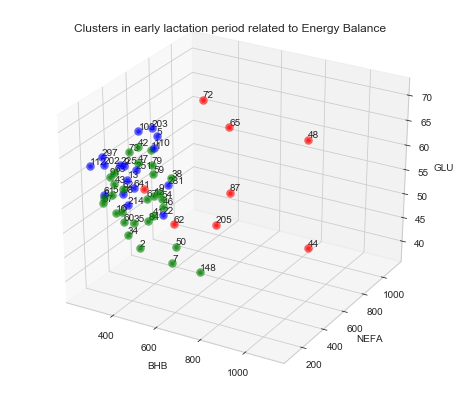

In [21]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-whitegrid')



fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111,projection='3d')

colors = ['red', 'blue', 'green', 'purple']
for i in range(len(df_tr)):
    x, y, z = df_tr.iloc[i]['BHB'], df_tr.iloc[i]['NEFA'], df_tr.iloc[i]['GLU']
    ax1.scatter(x, y, z, c=colors[int(df_tr.iloc[i]['clusters'])], alpha = 0.6, linewidths=4, label = 'clusters')
    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['cowid'].astype(int)),va='bottom', size=10)
 
    
ax1.set_xlabel('BHB')
ax1.set_ylabel('NEFA')
ax1.set_zlabel('GLU')

plt.title('Clusters in early lactation period related to Energy Balance')    
plt.show()


#for angle in range(0, 360):
#    ax1.view_init(300, angle)
#    plt.draw()
#    plt.pause(.001)

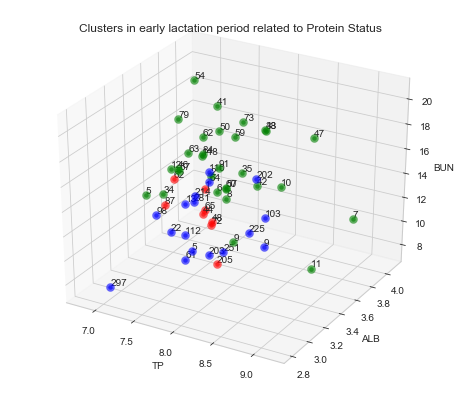

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
mpl.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111,projection='3d')

colors = ['red', 'blue', 'green', 'purple']
for i in range(len(df_tr)):
    x, y, z = df_tr.iloc[i]['TP'], df_tr.iloc[i]['ALB'], df_tr.iloc[i]['BUN']
    ax1.scatter(x, y, z, c=colors[int(df_tr.iloc[i]['clusters'])], alpha = 0.6, linewidths=4)
    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['cowid'].astype(int)),va='bottom', size=10)
 
    
ax1.set_xlabel('TP')
ax1.set_ylabel('ALB')
ax1.set_zlabel('BUN')


plt.title('Clusters in early lactation period related to Protein Status')   
plt.show()


#for angle in range(0, 360):
#     ax1.view_init(10, angle)
#     plt.draw()
#     plt.pause(.001)

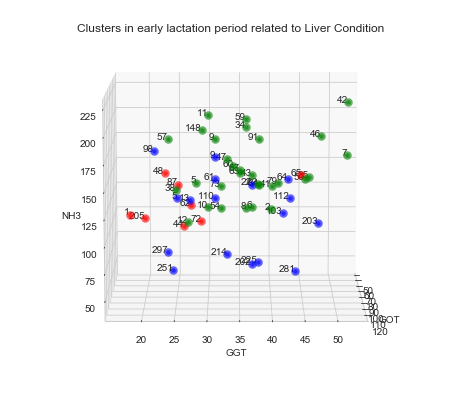

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
mpl.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111,projection='3d')

colors = ['red', 'blue', 'green']
for i in range(len(df_tr)):
    x, y, z = df_tr.iloc[i]['GOT'], df_tr.iloc[i]['GGT'], df_tr.iloc[i]['NH3']
    ax1.scatter(x, y, z, c=colors[int(df_tr.iloc[i]['clusters'])], alpha = 0.6, linewidths=4)
    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['cowid'].astype(int)),ha='right', size=10)
    
    
ax1.set_xlabel('GOT')
ax1.set_ylabel('GGT')
ax1.set_zlabel('NH3')


plt.title('Clusters in early lactation period related to Liver Condition')      
#plt.show()


for angle in range(0, 360):
    ax1.view_init(10, angle)
    plt.draw()
    plt.pause(.001)

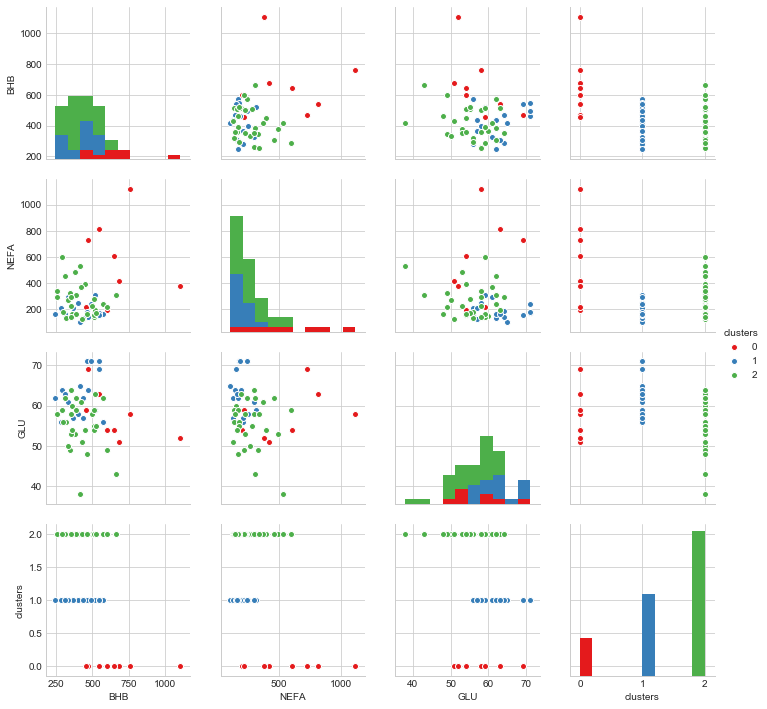

In [25]:
energy = df_tr[['BHB', 'NEFA', 'GLU','clusters']]

sns.pairplot(energy, kind="scatter",  diag_kind="hist", hue="clusters", markers=["o", "o", "o"], palette="Set1")
plt.show()


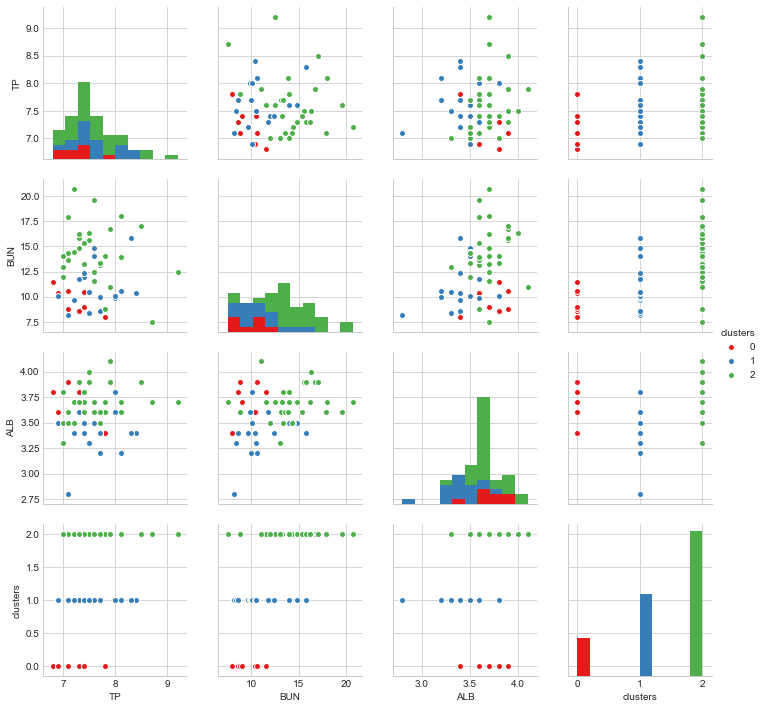

In [26]:
pro = df_tr[['TP', 'BUN', 'ALB','clusters']]

sns.pairplot(pro, kind="scatter",  diag_kind="hist", hue="clusters", markers=["o", "o", "o"], palette="Set1")
plt.show()


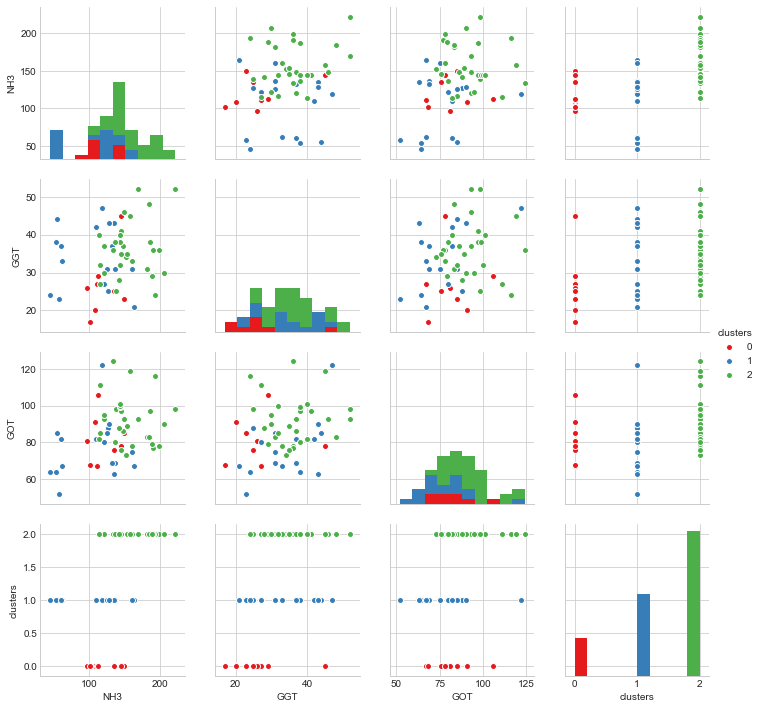

In [27]:
liver = df_tr[['NH3', 'GGT', 'GOT','clusters']]

sns.pairplot(liver, kind="scatter",  diag_kind="hist", hue="clusters", markers=["o", "o", "o"], palette="Set1")
plt.show()


In [28]:
df_tr

,global,cowid,days,TP,ALB,BUN,CHO,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB,clusters
0,863934238,205,31,7.8,3.4,8.0,153,91,20,10.9,4.9,51,109,417,680.4,0
1,864770057,62,32,6.8,3.8,11.5,178,67,27,10.5,5.0,54,111,196,601.6,0
2,856563216,297,32,7.1,2.8,8.2,161,52,23,10.0,6.6,64,57,189,287.9,1
3,1399102221,44,33,7.4,3.6,10.5,211,81,26,10.5,5.8,52,97,374,1108.5,0
4,1461212865,87,37,6.9,3.6,10.4,165,76,25,10.4,4.9,54,135,608,648.0,0
5,864142540,48,37,7.3,3.8,8.6,159,85,23,10.4,5.5,58,150,1118,759.4,0
6,1483811640,65,42,7.1,3.9,8.8,236,78,45,11.5,4.8,63,145,816,543.8,0
7,1396615953,72,43,7.4,3.7,9.0,162,106,29,10.6,4.5,69,113,726,468.0,0
8,1432015518,281,43,7.4,3.5,12.0,230,85,44,10.5,5.9,59,55,309,518.5,1
9,864207157,61,50,7.5,3.3,8.4,153,69,31,11.4,5.5,56,137,206,280.2,1


In [29]:
# Sort the dataframe by clusters
df_tr = df.sort_values(by="clusters")

In [30]:
def color_protein(value):
    if value < 6:
        color = 'red'
    elif value > 8.9:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_alb(value):
    if value < 3:
        color = 'red'
    elif value > 3.6:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_bun(value):
    if value < 13:
        color = 'red'
    elif value > 17:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_nefa(value):
    if value > 700:
        color = 'red'
    elif value < 100:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_glu(value):
    if value < 42:
        color = 'red'
    elif value > 68:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_ggt(value):
    if value > 27:
        color = 'red'
    elif value < 15 or value > 19:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_ca(value):
    if value < 8:
        color = 'red'
    elif value > 11:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_ip(value):
    if value < 3.5:
        color = 'red'
    elif value > 8:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_bhb(value):
    if value > 960:
        color = 'red'
    elif value < 163:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

def color_got(value):
    if value > 100:
        color = 'red'
    else:
        color = 'black'

    return 'color: %s' % color


In [31]:
new_df = df_tr.drop(columns=['CHO'])    

In [32]:
# Map individual data based on metabolites score limit

new_df.style.\
    applymap(color_protein, subset=['TP']).\
    applymap(color_alb, subset=['ALB']).\
    applymap(color_nefa, subset=['NEFA']).\
    applymap(color_ggt, subset=['GGT']).\
    applymap(color_ca, subset=['CA']).\
    applymap(color_ip, subset=['IP']).\
    applymap(color_glu, subset=['GLU']).\
    applymap(color_bhb, subset=['BHB']).\
    applymap(color_got, subset=['GOT']).\
    applymap(color_bun, subset=['BUN']).\
    to_excel('dairyearly.xlsx', engine='openpyxl')

In [33]:
def main():
    pro = df_tr["global"][(df_tr["TP"] < 6) | (df_tr["BUN"] < 13) | (df_tr["ALB"] < 3)].tolist()
    eb = df_tr["global"][(df_tr["NEFA"] > 700)| (df_tr["GLU"] < 42) | (df_tr["BHB"] > 960) ].tolist()
    liver = df_tr["global"][(df_tr["GOT"] > 100) | (df_tr["GGT"] > 27)].tolist()
    caip = df_tr["global"][(df_tr["CA"] < 8) | (df_tr["IP"] < 3.5)].tolist()
    
    
    print("Cow ID that need monitoring of Protein Status:", pro)
    print("Cow ID that needs monitoring of Energy Balance / Stress:", eb)
    print("Cow ID that need monitoring of Liver Status:", liver)
    print("Cow ID that need monitoring of Calcium/Phosphorus status:", caip)
    
if __name__ == "__main__":
    main()

Cow ID that need monitoring of Protein Status: [863934238, 864770057, 1399102221, 1461212865, 864142540, 1483811640, 1396615953, 1422815333, 1405617480, 863934320, 1362628666, 1449313898, 862968449, 1419604346, 856563216, 1436814124, 1511626260, 1461711245, 1432015518, 1406116319, 1373724340, 864207157, 1361557226, 1505910276, 1494659514, 1465611121, 1361557097, 1405617480, 864142632]
Cow ID that needs monitoring of Energy Balance / Stress: [1399102221, 864142540, 1483811640, 1396615953, 1465611121]
Cow ID that need monitoring of Liver Status: [1483811640, 1396615953, 1405617480, 1394819711, 863934320, 1449313898, 862968449, 1458511810, 1401416315, 1511626260, 1432015518, 1406116319, 1373724340, 864207157, 1399917832, 1512209752, 1416600150, 1394819674, 864141871, 1501556256, 1373724289, 1361557226, 1505910276, 1438312420, 864770057, 1436814124, 1465611121, 1514410118, 1477034833, 1417215391, 1494659514, 1437612545, 1465611121, 1361557097, 1373724159, 1405617480, 864142632, 864142588, 